# 3.  Codificación de variables

Conjunto de datos: titanic (incluido en seaborn)

Este conjunto de datos es excelente para trabajar con variables categóricas.

In [1]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
# Cargar el conjunto de datos
data = sns.load_dataset('titanic')

In [4]:
# Visualizar las primeras filas
print("Conjunto de datos Titanic:")
data.head()

Conjunto de datos Titanic:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Seleccionar columnas categóricas
categorical_cols = ['sex', 'embarked', 'class']

In [6]:
# Codificar con LabelEncoder
label_encoder = LabelEncoder()
data['sex_label'] = label_encoder.fit_transform(data['sex'])

In [7]:
# Codificar con OneHotEncoder
onehot_encoder = pd.get_dummies(data['embarked'], prefix='embarked')

In [8]:
# Combinar con el conjunto original
data = pd.concat([data, onehot_encoder], axis=1)

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado. Crea gráficas en donde veas correcto.

### 1. ¿Qué diferencias encuentras entre LabelEncoder y OneHotEncoder?

In [9]:
print("Ejemplo LabelEncore")
print("Original (sex):", data["sex"].unique())
print("Codificado (sex_label):", data["sex_label"].unique())

print("\nEjemplo OneHotEncoder:")
print("Original (embarked):", data["embarked"].unique())
print("\nCodificado (columnas dummy):")
print(onehot_encoder.head())

comparaison_df = pd.DataFrame({
    'Caracteristica': ['tipo de codificacion', 'Numero de columnas', 'Orden implicito', 'Uso tipico'],
    'LabelEncoder': ['Numerica ordinal', '1', 'si', 'Variables nominales'],
    'OneHotEncoder': ['Binaria', 'n (numero de categorias)', 'No', 'Variables nominales']
})
print("\nComparacion detallada:")
print(comparaison_df)

Ejemplo LabelEncore
Original (sex): ['male' 'female']
Codificado (sex_label): [1 0]

Ejemplo OneHotEncoder:
Original (embarked): ['S' 'C' 'Q' nan]

Codificado (columnas dummy):
   embarked_C  embarked_Q  embarked_S
0       False       False        True
1        True       False       False
2       False       False        True
3       False       False        True
4       False       False        True

Comparacion detallada:
         Caracteristica         LabelEncoder             OneHotEncoder
0  tipo de codificacion     Numerica ordinal                   Binaria
1    Numero de columnas                    1  n (numero de categorias)
2       Orden implicito                   si                        No
3            Uso tipico  Variables nominales       Variables nominales


### 2. Crea una gráfica de barras comparando las frecuencias de 'sex' antes y después de la codificación con LabelEncoder.

<>:22: SyntaxWarning: invalid escape sequence '\C'
<>:22: SyntaxWarning: invalid escape sequence '\C'
C:\Users\edu_3\AppData\Local\Temp\ipykernel_20216\1447751510.py:22: SyntaxWarning: invalid escape sequence '\C'
  print("\Codificado:")
C:\Users\edu_3\AppData\Local\Temp\ipykernel_20216\1447751510.py:22: SyntaxWarning: invalid escape sequence '\C'
  print("\Codificado:")


KeyError: 'sex_Label'

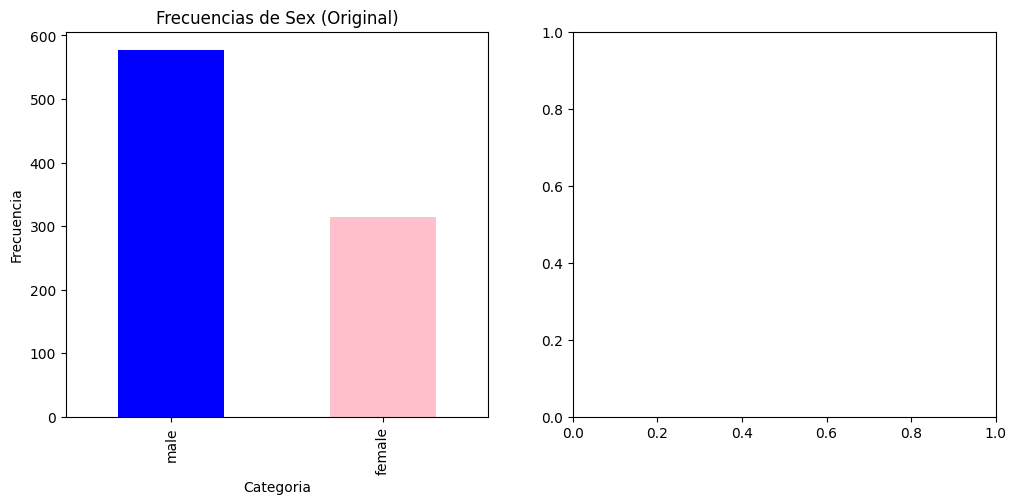

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1 )
data['sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Frecuencias de Sex (Original)')
plt.xlabel('Categoria')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
data['sex_Label'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Frecuencias de Sex (LabelEncoded)')
plt.xlabel('Codigo')
plt.ylabel('Frecuencia')


plt.tight_layout()
plt.show()

print("\nConteo de Valores:")
print("\nOriginal:")
print(data['sex'].value_counts())
print("\Codificado:")
print(data['sex_label'].value_counts())




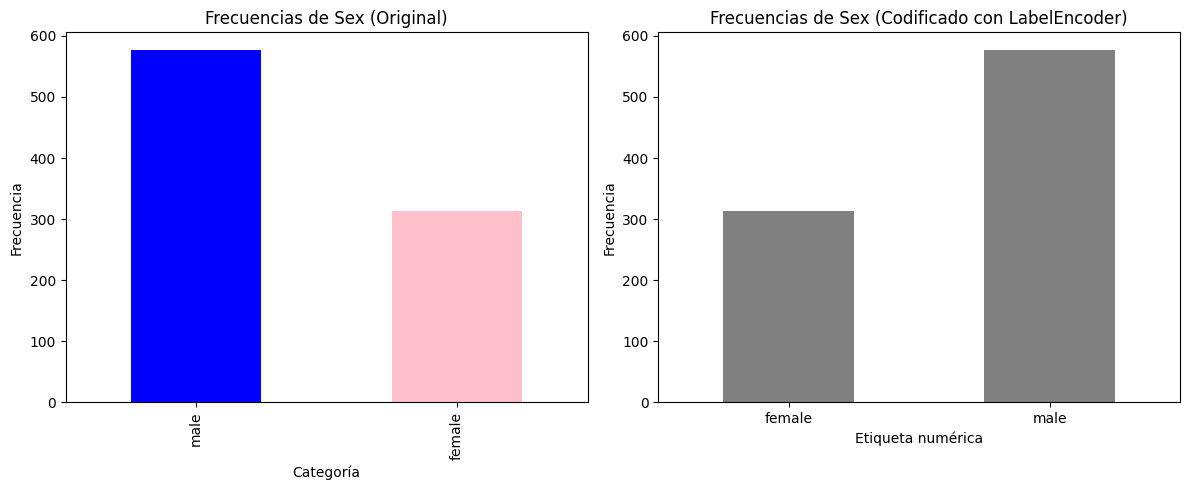

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Codificación con LabelEncoder
label_encoder = LabelEncoder()
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])

# Mapeo inverso para mostrar etiquetas originales
label_map = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Visualización
plt.figure(figsize=(12, 5))

# Gráfico original
plt.subplot(1, 2, 1)
data['sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Frecuencias de Sex (Original)')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Gráfico codificado
plt.subplot(1, 2, 2)
data['sex_encoded'].value_counts().sort_index().plot(kind='bar', color='gray')
plt.title('Frecuencias de Sex (Codificado con LabelEncoder)')
plt.xlabel('Etiqueta numérica')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(label_map)), labels=[label_map[i] for i in range(len(label_map))], rotation=0)

plt.tight_layout()
plt.show()

### 3. Utiliza OneHotEncoder para codificar la columna 'class'. ¿Qué ventajas tiene este enfoque frente a LabelEncoder?

In [11]:
class_onehot = pd.get_dummies(data['class'], prefix='class')

print("Primeras fila de la codificacion one-hot:")
print(class_onehot.head())

label_encoder = LabelEncoder()
class_label = label_encoder.fit_transform(data['class'])
        

Primeras fila de la codificacion one-hot:
   class_First  class_Second  class_Third
0        False         False         True
1         True         False        False
2        False         False         True
3         True         False        False
4        False         False         True


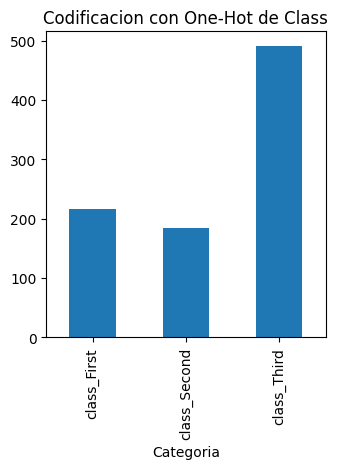

In [12]:

plt.subplot(1, 2, 2)
class_onehot.sum().plot(kind='bar')
plt.title('Codificacion con One-Hot de Class')
plt.xlabel('Categoria')

plt.tight_layout()
plt.show()

Primeras filas de la codificación One-Hot:
   class_First  class_Second  class_Third
0        False         False         True
1         True         False        False
2        False         False         True
3         True         False        False
4        False         False         True


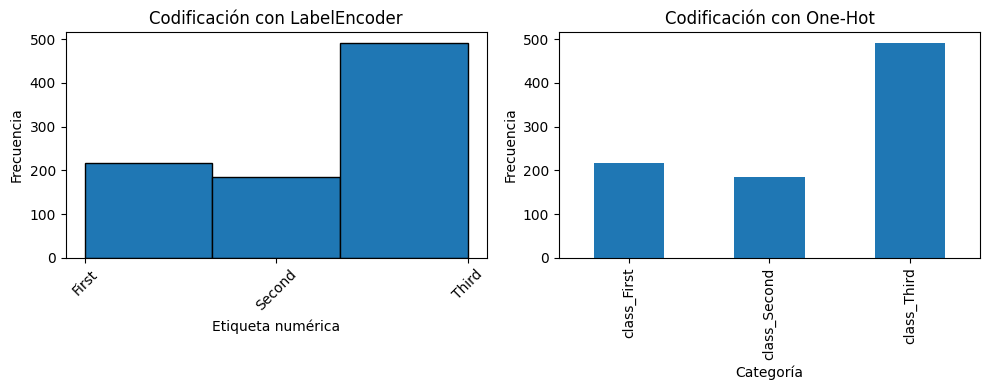

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Codificación One-Hot
class_onehot = pd.get_dummies(data['class'], prefix='class')
print("Primeras filas de la codificación One-Hot:")
print(class_onehot.head())

# Codificación Label
label_encoder = LabelEncoder()
class_label = label_encoder.fit_transform(data['class'])

# Visualización
plt.figure(figsize=(10, 4))

# Gráfico de Label Encoding
plt.subplot(1, 2, 1)
plt.hist(class_label, bins=len(set(class_label)), edgecolor='black')
plt.title('Codificación con LabelEncoder')
plt.xlabel('Etiqueta numérica')
plt.ylabel('Frecuencia')
plt.xticks(range(len(label_encoder.classes_)), label_encoder.classes_, rotation=45)

# Gráfico de One-Hot Encoding
plt.subplot(1, 2, 2)
class_onehot.sum().plot(kind='bar')
plt.title('Codificación con One-Hot')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### 4. Si quisieras aplicar un modelo de aprendizaje automático, ¿qué tipo de codificación elegirías para las variables categóricas? Explica tu respuesta.

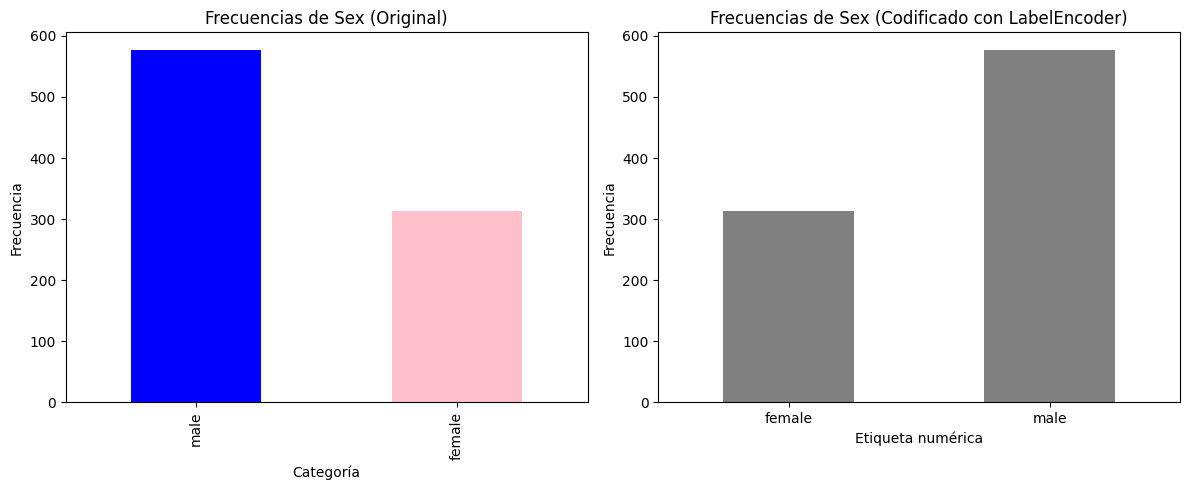

In [15]:
# Codificación con LabelEncoder
label_encoder = LabelEncoder()
data['sex_encoded'] = label_encoder.fit_transform(data['sex'])

# Mapeo inverso para mostrar etiquetas originales
label_map = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Visualización
plt.figure(figsize=(12, 5))

# Gráfico original
plt.subplot(1, 2, 1)
data['sex'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Frecuencias de Sex (Original)')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')

# Gráfico codificado
plt.subplot(1, 2, 2)
data['sex_encoded'].value_counts().sort_index().plot(kind='bar', color='gray')
plt.title('Frecuencias de Sex (Codificado con LabelEncoder)')
plt.xlabel('Etiqueta numérica')
plt.ylabel('Frecuencia')
plt.xticks(ticks=range(len(label_map)), labels=[label_map[i] for i in range(len(label_map))], rotation=0)

plt.tight_layout()
plt.show()